In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import TimeSeriesSplit
import numpy as np

### Data Collection

In [2]:
import requests

# URLs of the files
train_data_url = 'https://www.raphaelcousin.com/modules/module5/exercise/module5_exercise_train.csv'
test_data_url = 'https://www.raphaelcousin.com/modules/module5/exercise/module5_exercise_test.csv'

# Function to download a file
def download_file(url, file_name):
    response = requests.get(url)
    response.raise_for_status()  # Ensure we notice bad responses
    with open(file_name, 'wb') as file:
        file.write(response.content)
    print(f'Downloaded {file_name} from {url}')

# Downloading the files
download_file(train_data_url, 'module5_exercise_train.csv')
download_file(test_data_url, 'module5_exercise_test.csv')

Downloaded module5_exercise_train.csv from https://www.raphaelcousin.com/modules/module5/exercise/module5_exercise_train.csv
Downloaded module5_exercise_test.csv from https://www.raphaelcousin.com/modules/module5/exercise/module5_exercise_test.csv


In [3]:
df_train =  pd.read_csv("module5_exercise_train.csv", sep=",")
df_test =  pd.read_csv("module5_exercise_test.csv", sep=",")

In [4]:
df_test

,date,weather_condition,humidity,wind_speed,oil_brent_price_indicator,temperature_station1,temperature_station2,temperature_station3,temperature_station4,temperature_station5,temperature_station6,temperature_station7,temperature_station8,temperature_station9,temperature_station10
0,2019-01-01,Rainy,72.985535,5.83 km/h,High,NaN,2.041746,1.992639,2.821712,1.636189,2.795024,1.674621,2.832348,2.058945,2.022864
1,2019-01-02,Snowy,70.869436,1.30 m/s,Moderate,1.764737,1.883483,1.791074,1.345804,2.136792,NaN,NaN,1.628191,1.873431,1.329898
2,2019-01-03,Cloudy,64.788216,0.21 m/s,Moderate,3.577973,3.311595,3.873189,3.324726,3.620829,3.380151,3.277014,3.370558,NaN,3.302191
3,2019-01-04,Cloudy,63.144525,0.00 m/s,High,3.098592,2.863002,3.308336,NaN,3.124391,3.385149,2.976644,2.638640,3.079406,3.062108
4,2019-01-05,Snowy,69.346089,4.01 km/h,Moderate,-0.118532,-0.288575,0.600495,-0.081421,0.455634,-0.489217,0.611884,0.367237,-0.244052,-0.297963
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,2019-12-27,Snowy,71.521673,22.78 km/h,Moderate,-1.674798,-2.338987,-1.829170,-0.881428,-0.571347,-2.231680,-1.962735,-1.602805,-1.264779,-1.705180
361,2019-12-28,Sunny,67.220123,18.33 km/h,High,3.209205,2.508606,2.195577,NaN,NaN,3.236547,3.181473,3.094390,NaN,3.475638
362,2019-12-29,Rainy,68.085227,7.24 m/s,Moderate,3.688132,3.919479,NaN,4.071717,4.365347,3.580358,3.404292,4.173461,3.755625,4.070333
363,2019-12-30,Cloudy,65.877214,7.67 m/s,Moderate,NaN,0.700484,NaN,-0.407440,-0.580917,-0.444730,0.034229,0.021199,-0.864657,NaN


### Data analysis

In [5]:
#### Make a complete analysis on data preprocessing
# Inconsistencies
# Duplicates (data.duplicated().sum())
# Missing values (data.isnull().sum())
# Categorical
# Outliers
# Feature Engineering
# Feature Selection and/or Dimensionality Reduction

In [6]:
data = pd.concat([df_train, df_test], axis=0)

In [7]:
df_train.shape

(1909, 16)

In [8]:
df_test.shape

(365, 15)

In [9]:
def plot_feature_over_time(df, feature, date_id_start, date_id_end):
    df_filtered = df[(df['date'] >= date_id_start) & (df['date'] <= date_id_end)]
    
    if feature not in df_filtered.columns:
        print(f"Feature '{feature}' not found in the DataFrame.")
        return
    
    # Plotting
    plt.figure(figsize=(10, 6))
    plt.plot(df_filtered['date'], df_filtered[feature], label=feature, linestyle='-')
    plt.xlabel('Date')
    plt.ylabel(feature)
    plt.title(f'{feature} from {date_id_start} to {date_id_end}')
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()



In [10]:
a = df_train[df_train['electricity_demand'] > 0]
a['electricity_demand'].mean()
# np.amin(df_train['electricity_demand'])

223.4619673895856

In [11]:
data['date'] = pd.to_datetime(data['date'])

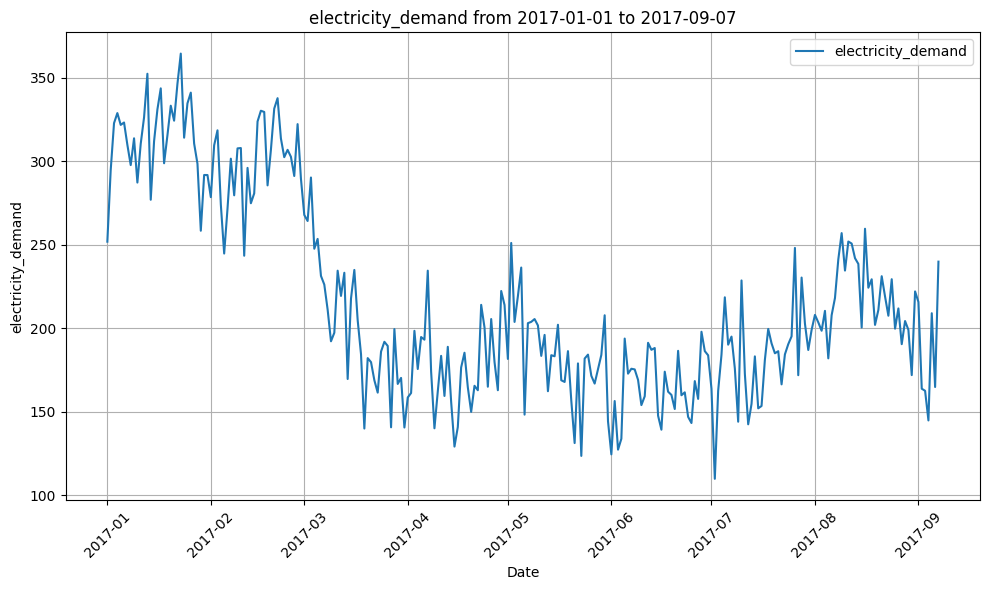

In [12]:
plot_feature_over_time(data, 'electricity_demand', '2017-01-01', '2017-09-07')

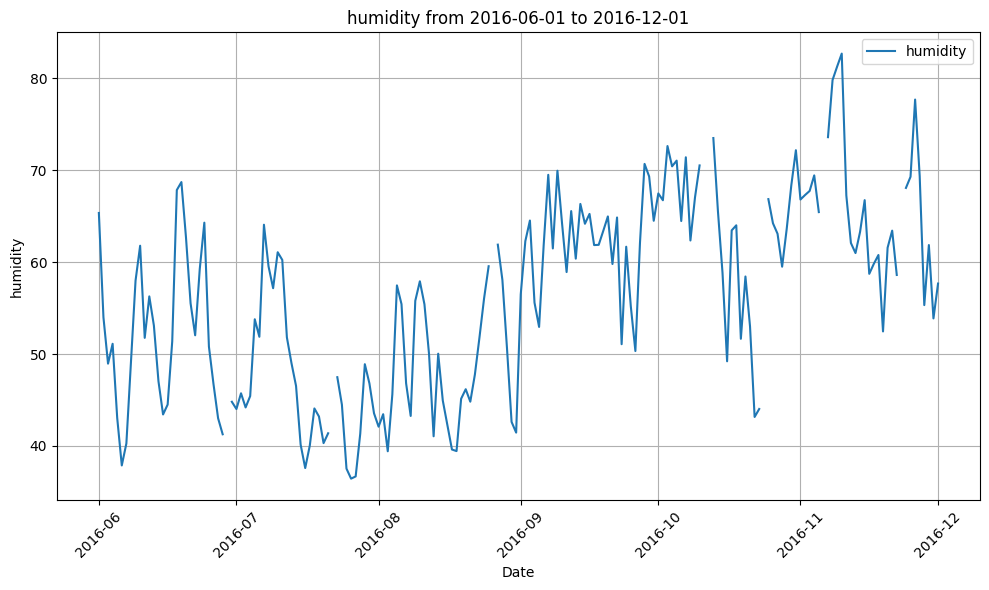

In [13]:
plot_feature_over_time(data, 'humidity', '2016-06-01', '2016-12-01')

### Data Preprocessing Evaluation Strategy

In [14]:
# Provide a complete data preprocessing transformations

In [15]:
df_train

,date,weather_condition,humidity,wind_speed,oil_brent_price_indicator,temperature_station1,temperature_station2,temperature_station3,temperature_station4,temperature_station5,temperature_station6,temperature_station7,temperature_station8,temperature_station9,temperature_station10,electricity_demand
0,2015-01-08,Cloudy,69.304377,27.74 km/h,Moderate,0.369411,NaN,0.159977,0.118224,-0.444455,0.313675,0.106192,0.369430,1.279470,-0.384661,273.511353
1,2015-01-09,Sunny,55.955975,21.78 km/h,Moderate,2.009903,NaN,1.617242,NaN,2.160063,2.515627,1.867474,1.953165,1.878233,1.582365,258.827085
2,2015-01-10,Rainy,62.701614,6.83 m/s,Moderate,-2.603544,-2.422001,-3.685819,-2.392354,-1.936704,-2.950332,-3.074828,-2.698650,-2.354860,-2.770883,302.535033
3,2015-01-11,Snowy,60.375001,5.79 m/s,Moderate,-3.789836,-3.974054,-3.217545,-4.397143,-3.375188,-3.650454,-5.004991,-3.233724,-4.227899,NaN,296.270989
4,2015-01-12,Snowy,NaN,25.14 km/h,High,-2.405522,-2.161129,-2.880773,-2.587199,NaN,NaN,NaN,NaN,-2.790422,-2.033098,323.498090
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1904,2019-12-28,Sunny,67.220123,18.33 km/h,High,3.209205,2.508606,2.195577,NaN,NaN,3.236547,3.181473,3.094390,NaN,3.475638,254.061886
1905,2019-12-29,Rainy,68.085227,7.24 m/s,Moderate,3.688132,3.919479,NaN,4.071717,4.365347,3.580358,3.404292,4.173461,3.755625,4.070333,266.231273
1906,2019-12-29,Rainy,68.085227,7.24 m/s,Moderate,3.688132,3.919479,NaN,4.071717,4.365347,3.580358,3.404292,4.173461,3.755625,4.070333,266.231273
1907,2019-12-30,Cloudy,65.877214,7.67 m/s,Moderate,NaN,0.700484,NaN,-0.407440,-0.580917,-0.444730,0.034229,0.021199,-0.864657,NaN,296.431897


In [16]:
df_train.columns

Index(['date', 'weather_condition', 'humidity', 'wind_speed',
       'oil_brent_price_indicator', 'temperature_station1',
       'temperature_station2', 'temperature_station3', 'temperature_station4',
       'temperature_station5', 'temperature_station6', 'temperature_station7',
       'temperature_station8', 'temperature_station9', 'temperature_station10',
       'electricity_demand'],
      dtype='object')

In [17]:
# 1. Handle Inconsistencies
def handle_inconsistencies(X_train, y_train, X_val=None):
    def convert_wind_speed(wind_speed):
        if pd.isnull(wind_speed):
            return None
        value, unit = wind_speed.split(' ')
        value = float(value)
        if unit == 'km/h':
            return value / 3.6
        return value

    X_train['wind_speed'] = X_train['wind_speed'].apply(convert_wind_speed)
    if X_val is not None:
        X_val['wind_speed'] = X_val['wind_speed'].apply(convert_wind_speed)
        return X_train.copy(), y_train, X_val.copy()
    else:
        return X_train.copy(), y_train

# 2. Handling Duplicates
def handle_duplicates(X_train, y_train, X_val=None):
    X_train_no_duplicates = X_train.drop_duplicates()
    y_train_no_duplicates = y_train.loc[X_train_no_duplicates.index]
    if X_val is not None:
        return X_train_no_duplicates, y_train_no_duplicates, X_val.copy()
    else:
        return X_train_no_duplicates, y_train_no_duplicates

# 3. Handling Missing Values
def handle_missing_values(X_train, y_train, X_val=None):
    X_train = X_train.fillna(method='ffill')
    if X_val is not None:
        X_val = X_val.fillna(method='ffill')
        X_val = X_val.fillna(method='bfill')
        return X_train.copy(), X_val.copy()
    else:
        return X_train

# 4. Handling Categorical Values
def handle_categorical(X_train, y_train, X_val=None):
    # Convert 'oil_brent_price_indicator' as ordinal
    X_train['oil_brent_price_indicator'] = X_train['oil_brent_price_indicator'].astype('category').cat.codes
    X_train = pd.get_dummies(X_train, columns=['weather_condition'], drop_first=True)

    if X_val is not None:
        X_val['oil_brent_price_indicator'] = X_val['oil_brent_price_indicator'].astype('category').cat.codes
        X_val = pd.get_dummies(X_val, columns=['weather_condition'], drop_first=True)
        return X_train.copy(), X_val.copy()
    else:
        return X_train.copy()

# 5. Handling Outliers
def handle_outliers(X_train, y_train, X_val=None):
    # Set humidity > 100 to 100 and correct negative values in y_train
    X_train['humidity'] = X_train['humidity'].apply(lambda x: min(x, 100) if not pd.isnull(x) else x)
    y_train = y_train.apply(lambda y: max(y, 0))

    if X_val is not None:
        X_val['humidity'] = X_val['humidity'].apply(lambda x: min(x, 100) if not pd.isnull(x) else x)
        return X_train.copy(), y_train, X_val.copy()
    else:
        return X_train.copy(), y_train

# 6. Feature Engineering
def feature_engineering(X_train, y_train, X_val=None):
    # Ensure 'date' column is in datetime format
    X_train['date'] = pd.to_datetime(X_train['date'])
    X_train['weekday'] = X_train['date'].dt.dayofweek
    X_train = pd.get_dummies(X_train, columns=['weekday'], drop_first=True)

    if X_val is not None:
        X_val['date'] = pd.to_datetime(X_val['date'])
        X_val['weekday'] = X_val['date'].dt.dayofweek
        X_val = pd.get_dummies(X_val, columns=['weekday'], drop_first=True)
        return X_train.copy(), y_train, X_val.copy()
    else:
        return X_train.copy(), y_train


# 7. Feature Selection and Dimensionality Reduction
def feature_selection(X_train, y_train, X_val=None):
    columns_to_remove = [
        'weather_condition','date', 'temperature_station2', 'temperature_station3', 'temperature_station4', 
        'temperature_station5', 'temperature_station6', 'temperature_station7',
        'temperature_station8', 'temperature_station9', 'temperature_station10'
    ]
    
    columns_to_keep = [col for col in X_train.columns if col not in columns_to_remove]
    
    if X_val is not None:
        return X_train[columns_to_keep], X_val[columns_to_keep]
    else:
        return X_train[columns_to_keep]



In [18]:
def evaluate_pipeline(X, y, n_splits=5):

    ### call transformations here, if there is no learning and no need to be crossval
    X, y = handle_inconsistencies(X, y)
    X, y = handle_duplicates(X, y)
    X  = handle_missing_values(X, y)
    X_train = handle_categorical(X, y)
    X, y = handle_outliers(X, y)
    X, y = feature_engineering(X, y)
    X = feature_selection(X, y)
    
    model = LinearRegression()
    
    tscv = TimeSeriesSplit(n_splits=n_splits)
    
    train_scores = []
    val_scores = []
    
    for fold, (train_index, val_index) in enumerate(tscv.split(X)):
        print(f"Processing fold {fold + 1}/{n_splits}...")
        
        # Split data into train and validation sets
        X_train, X_val = X.iloc[train_index].copy(), X.iloc[val_index].copy()
        y_train, y_val = y.iloc[train_index].copy(), y.iloc[val_index].copy()

        ### call transformations here, if there is learning
        # X_train, y_train, X_val = handle_inconsistencies(X_train, y_train, X_val)
        # X_train, y_train, X_val = handle_duplicates(X_train, y_train, X_val)
        # X_train, X_val = handle_missing_values(X_train, y_train, X_val)
        # X_train, X_val = handle_categorical(X_train, y_train, X_val)
        # X_train, y_train, X_val = handle_outliers(X_train, y_train, X_val)
        # X_train, y_train, X_val = feature_engineering(X_train, y_train, X_val)
        # X_train, X_val = feature_selection(X_train, y_train, X_val)
        
        # Train the model
        model.fit(X_train, y_train)
        
        # Predict on training set
        y_train_pred = model.predict(X_train)
        train_mse = mean_squared_error(y_train, y_train_pred)
        train_scores.append(train_mse)
        
        # Predict on validation set
        y_val_pred = model.predict(X_val)
        val_mse = mean_squared_error(y_val, y_val_pred)
        val_scores.append(val_mse)
        
        print(f"Fold {fold + 1} Train MSE: {train_mse:.4f}, Validation MSE: {val_mse:.4f}")
    
    # Compute mean, max, and min values for train and validation MSE
    mean_train_mse = np.mean(train_scores)
    max_train_mse = np.max(train_scores)
    min_train_mse = np.min(train_scores)
    
    mean_val_mse = np.mean(val_scores)
    max_val_mse = np.max(val_scores)
    min_val_mse = np.min(val_scores)
    
    # Print results
    print("\nTrain MSE:")
    print(f"Mean: {mean_train_mse:.4f}, Max: {max_train_mse:.4f}, Min: {min_train_mse:.4f}")
    
    print("\nValidation MSE:")
    print(f"Mean: {mean_val_mse:.4f}, Max: {max_val_mse:.4f}, Min: {min_val_mse:.4f}")
    
    return mean_val_mse  # Return mean validation MSE as the overall score

In [19]:
# Prepare X and y
X = df_train.copy().drop(columns=['electricity_demand'], axis=1)
y = df_train.copy().pop('electricity_demand')

# Run the evaluation
evaluate_pipeline(X, y)

Processing fold 1/5...
Fold 1 Train MSE: 932.4027, Validation MSE: 1472.1235
Processing fold 2/5...
Fold 2 Train MSE: 1165.5250, Validation MSE: 1098.2358
Processing fold 3/5...
Fold 3 Train MSE: 1108.1148, Validation MSE: 1540.5782
Processing fold 4/5...
Fold 4 Train MSE: 1212.5437, Validation MSE: 1249.8389
Processing fold 5/5...
Fold 5 Train MSE: 1215.1052, Validation MSE: 1170.9915

Train MSE:
Mean: 1126.7383, Max: 1215.1052, Min: 932.4027

Validation MSE:
Mean: 1306.3536, Max: 1540.5782, Min: 1098.2358


/tmp/ipykernel_26406/3883827406.py:30: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  X_train = X_train.fillna(method='ffill')


1306.35358006657

### Generating Submission File

In [26]:
# Train and submit your results

In [22]:
# Prepare X_train and y_train from your data
df_train =  pd.read_csv("module5_exercise_train.csv", sep=",")

X_train = df_train.drop(columns=['electricity_demand'], axis=1)
y_train = df_train['electricity_demand']

X_test =  pd.read_csv("module5_exercise_test.csv", sep=",")

In [24]:
def train_and_predict_to_submit(X_train, y_train, X_test):
    model = LinearRegression()
    
    X_train, y_train, X_test = handle_inconsistencies(X_train, y_train, X_test)
    print(X_test.isnull().sum().sum())
    X_train, y_train, X_test = handle_duplicates(X_train, y_train, X_test)
    print(X_test.isnull().sum().sum())
    X_train, X_test = handle_missing_values(X_train, y_train, X_test)
    print(X_test.isnull().sum().sum())
    X_train, X_test = handle_categorical(X_train, y_train, X_test)
    print(X_test.isnull().sum().sum())
    X_train, y_train, X_test = handle_outliers(X_train, y_train, X_test)
    print(X_test.isnull().sum().sum())
    X_train, y_train, X_test = feature_engineering(X_train, y_train, X_test)
    print(X_test.isnull().sum().sum())
    X_train, X_test = feature_selection(X_train, y_train, X_test)

    # Train the model on the entire training set
    print(f"Training model on entire dataset of shape: {X_train.shape}")
    model.fit(X_train, y_train)
    
    # Predict on the test set
    print(f"Predicting on test dataset of shape: {X_test.shape}")
    y_test_pred = model.predict(X_test)

    
    
    return y_test_pred

In [27]:
y_test_pred

array([262.88003682, 290.98037812, 254.9816947 , 260.71984978,
       283.43064736, 245.47249598, 303.93615055, 304.87023598,
       277.13867663, 317.58219192, 317.11838112, 303.05521176,
       268.84063276, 325.96169779, 283.0314754 , 320.59706684,
       292.48612263, 282.08470822, 272.30694472, 318.70122944,
       327.43193065, 331.58586912, 286.42129738, 322.7369604 ,
       320.01707546, 246.95157753, 305.44549407, 310.77129976,
       303.95815453, 267.33635605, 290.97152973, 302.83206582,
       248.72422952, 243.35105852, 264.06192619, 271.38011143,
       297.36479249, 297.85282467, 287.52589068, 235.6892737 ,
       242.13561192, 309.54027904, 263.62293308, 270.50967974,
       270.15977469, 293.64939259, 282.47501281, 277.1971449 ,
       262.71212449, 300.83391772, 299.48281506, 319.17719595,
       281.68283646, 254.2581186 , 288.60913795, 267.60941142,
       260.52856272, 264.00328984, 258.98020087, 259.78911795,
       229.78730826, 215.9952406 , 253.4442105 , 255.32

In [25]:
# Call serve_model to train and predict
y_test_pred = train_and_predict_to_submit(X_train, y_train, X_test)

566
566
0
0
0
0
Training model on entire dataset of shape: (1819, 13)
Predicting on test dataset of shape: (365, 13)


/tmp/ipykernel_26406/3883827406.py:30: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  X_train = X_train.fillna(method='ffill')
/tmp/ipykernel_26406/3883827406.py:32: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  X_val = X_val.fillna(method='ffill')
/tmp/ipykernel_26406/3883827406.py:33: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  X_val = X_val.fillna(method='bfill')


In [28]:
X_test

,date,weather_condition,humidity,wind_speed,oil_brent_price_indicator,temperature_station1,temperature_station2,temperature_station3,temperature_station4,temperature_station5,temperature_station6,temperature_station7,temperature_station8,temperature_station9,temperature_station10
0,2019-01-01,Rainy,72.985535,1.619444,High,NaN,2.041746,1.992639,2.821712,1.636189,2.795024,1.674621,2.832348,2.058945,2.022864
1,2019-01-02,Snowy,70.869436,1.300000,Moderate,1.764737,1.883483,1.791074,1.345804,2.136792,NaN,NaN,1.628191,1.873431,1.329898
2,2019-01-03,Cloudy,64.788216,0.210000,Moderate,3.577973,3.311595,3.873189,3.324726,3.620829,3.380151,3.277014,3.370558,NaN,3.302191
3,2019-01-04,Cloudy,63.144525,0.000000,High,3.098592,2.863002,3.308336,NaN,3.124391,3.385149,2.976644,2.638640,3.079406,3.062108
4,2019-01-05,Snowy,69.346089,1.113889,Moderate,-0.118532,-0.288575,0.600495,-0.081421,0.455634,-0.489217,0.611884,0.367237,-0.244052,-0.297963
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,2019-12-27,Snowy,71.521673,6.327778,Moderate,-1.674798,-2.338987,-1.829170,-0.881428,-0.571347,-2.231680,-1.962735,-1.602805,-1.264779,-1.705180
361,2019-12-28,Sunny,67.220123,5.091667,High,3.209205,2.508606,2.195577,NaN,NaN,3.236547,3.181473,3.094390,NaN,3.475638
362,2019-12-29,Rainy,68.085227,7.240000,Moderate,3.688132,3.919479,NaN,4.071717,4.365347,3.580358,3.404292,4.173461,3.755625,4.070333
363,2019-12-30,Cloudy,65.877214,7.670000,Moderate,NaN,0.700484,NaN,-0.407440,-0.580917,-0.444730,0.034229,0.021199,-0.864657,NaN


In [26]:
mean_squared_error(X_test['electricity_demand'], y_test_pred)

KeyError: 'electricity_demand'

In [ ]:
y_test_pred

In [29]:
# Generating Submission File
submission = pd.DataFrame({
    'date': X_test['date'],
    'electricity_demand': y_test_pred
})

# Save the submission file
submission.to_csv('submission.csv', index=False, sep=',')
print("Submission file saved as 'submission.csv'.")

Submission file saved as 'submission.csv'.
